# Python Project For Data Science

In [31]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Question 01

In [2]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period = 'max')

In [5]:
tesla_data.reset_index(inplace=True)

In [19]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


# Question 02

In [46]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text

print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [47]:
soup = BeautifulSoup(html_data, "html.parser")

In [48]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming you have already downloaded the webpage and stored the HTML data in the 'html_data' variable

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table body containing the Tesla Quarterly Revenue table
table_body = soup.find_all("tbody")[1]

# Extract the table rows
rows = table_body.find_all('tr')
data = []
for row in rows:
    cells = row.find_all('td')
    if len(cells) == 2:
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display the DataFrame
print(tesla_revenue)


          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

In [49]:
print(tesla_revenue.tail(5))

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


# Question 03

In [34]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [35]:
GameStop = yf.Ticker("GME")

In [41]:
gme_data = GameStop.history(period = "max")

In [42]:
gme_data.reset_index(inplace = True)

In [43]:
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 06

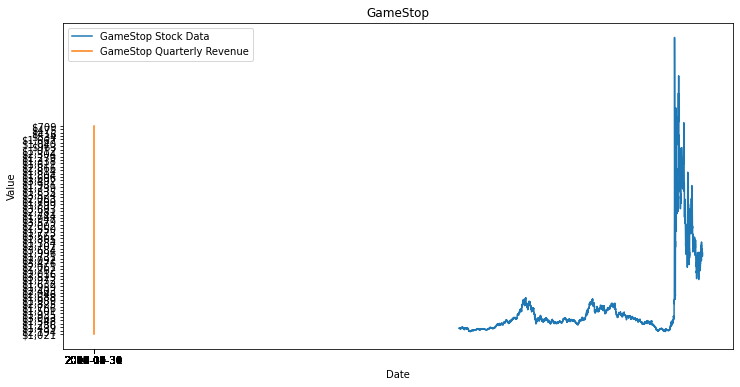

In [56]:
import matplotlib.pyplot as plt

# Assuming you have the 'gme_data' DataFrame and 'gme_revenue' DataFrame

def make_graph(stock_data, revenue_data, title):
    # Plotting the stock data
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='GameStop Stock Data')

    # Plotting the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='GameStop Quarterly Revenue')

    # Set title and labels
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')

    # Add legend
    plt.legend()

    # Display the graph
    plt.show()

# Call the make_graph function

make_graph(gme_data, gme_revenue, 'GameStop')



# Question 04

In [12]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
html_data = response.text

print(html_data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [13]:
soup = BeautifulSoup(html_data, "html.parser")

In [15]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming you have already downloaded the webpage and stored the HTML data in the 'html_data' variable

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table body containing the Tesla Quarterly Revenue table
table_body = soup.find_all("tbody")[1]

# Extract the table rows
rows = table_body.find_all('tr')
data = []
for row in rows:
    cells = row.find_all('td')
    if len(cells) == 2:
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)

# Create a DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display the DataFrame
print(gme_revenue)


          Date Revenue
0   2020-04-30  $1,021
1   2020-01-31  $2,194
2   2019-10-31  $1,439
3   2019-07-31  $1,286
4   2019-04-30  $1,548
..         ...     ...
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709

[62 rows x 2 columns]


In [16]:
print(gme_revenue.tail(5))

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


# Question 05

In [24]:
tesla = yf.Ticker("TSLA")

In [25]:
tesla_data = tesla.history(period = 'max')

<AxesSubplot:xlabel='Date'>

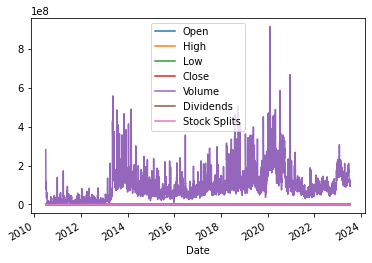

In [29]:
tesla_data.plot()